# Quick start guide

## Install Lakeview

Install Lakeview from [PyPI](https://pypi.org/project/lakeview/):

```sh
pip install lakeview
```


## Import Lakeview

In [1]:
import lakeview as lv

## Get the BAM file

Wwe are going to visualize Illumina paired-end sequencing data from the SKBR3 breast cancer cell line. This example dataset is also used by [IGV Web](https://igv.org/app/). [Another example based on the same dataset](SKBR3) can be found in [Gallery](Gallery).

Here assume the BAM file to be visualised is available locally. If the BAM file exists on a remote server instead of your local machine, you may choose to:

- download the entire BAM file to your local machine;
- download a subset of the BAM file that contains your region of interest;
- or run Lakeview on the server and download the output figures.

In [2]:
BAM_PATH = "../../tests/data/SKBR3_Illumina_550bp_pcrFREE.bam"

## Load data from the BAM file

Lakeview works by first loading the alignment data into the memory before making visualisations, which enables the data to be checked and optionally preprocessed before visualisation. If you are running Python interactively (e.g. via [Jupyter Notebook](https://jupyter.org/)), you will also be able to make incremental adjustments to the plot without reloading the data. 

In [3]:

# Specify the region of interest as "chromosome:start-end". 
# Commas are optional.
REGION = "17:64,040,802-64,045,633"

# Load data from the BAM file
painter = lv.SequenceAlignment.from_file(BAM_PATH, region=REGION)

## Create an empty `GenomeViewer`

A `GenomeViewer` represents a blank canvas with one or more tracks, all of which share the same start and end coordinates. It handles general operations related to the visualisation, such as creating/saving the figure, specifying the figure size, adjusting start/end coordinates, labelling tracks, setting a title, and formatting ticks. 

If you are familiar with [Matplotlib](https://matplotlib.org/), think of `GenomeViewer` as a wrapper around a [Figure](matplotlib.figure.Figure) with several tracks ([Axes](matplotlib.axes.Axes)) that share the x axis limits. 

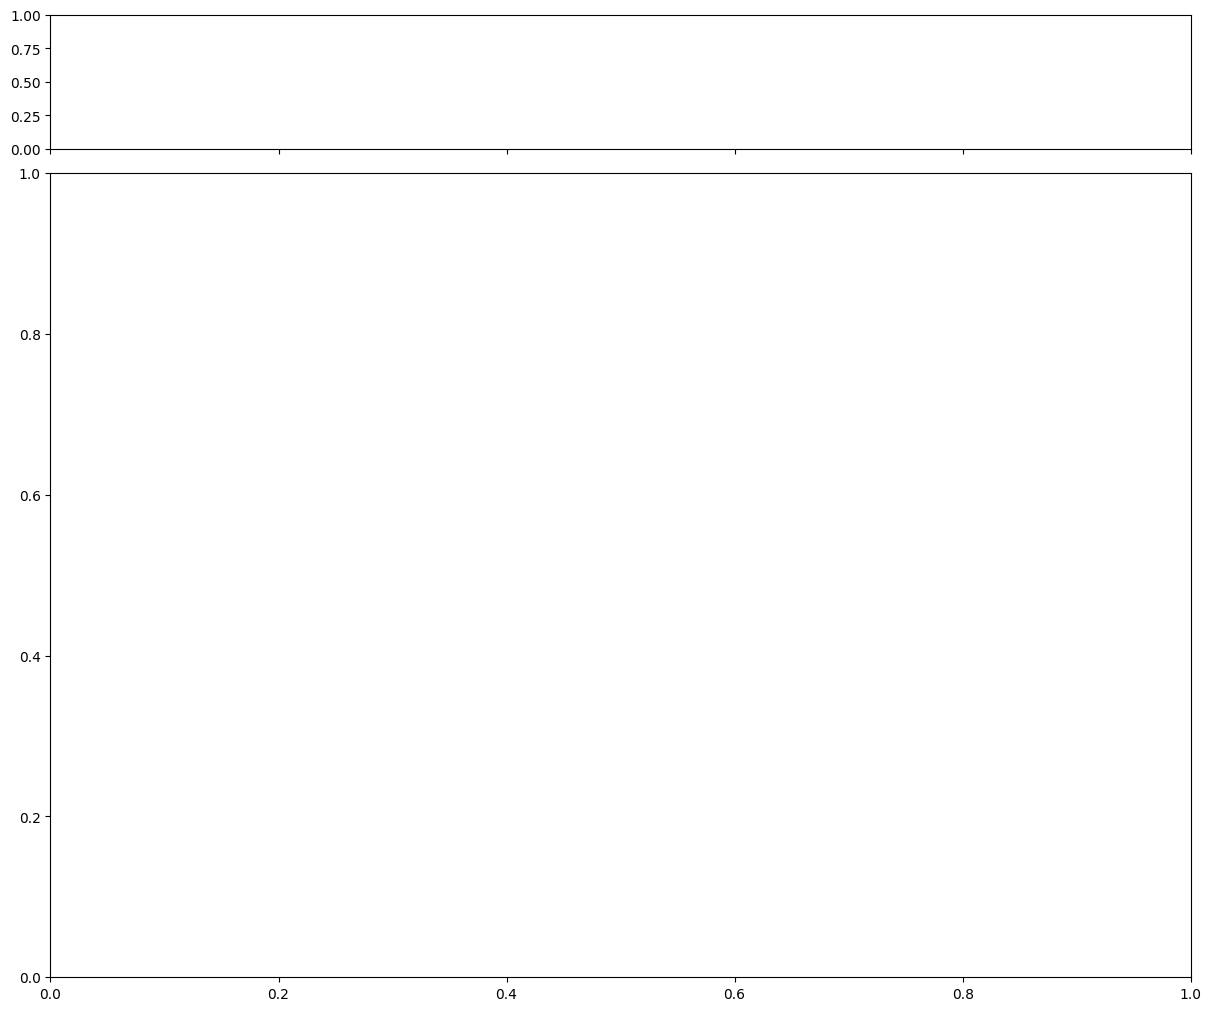

In [4]:
# Create a GenomeViewer with two tracks
gv = lv.GenomeViewer(tracks=2, height_ratios=(1, 6), figsize=(12, 10))

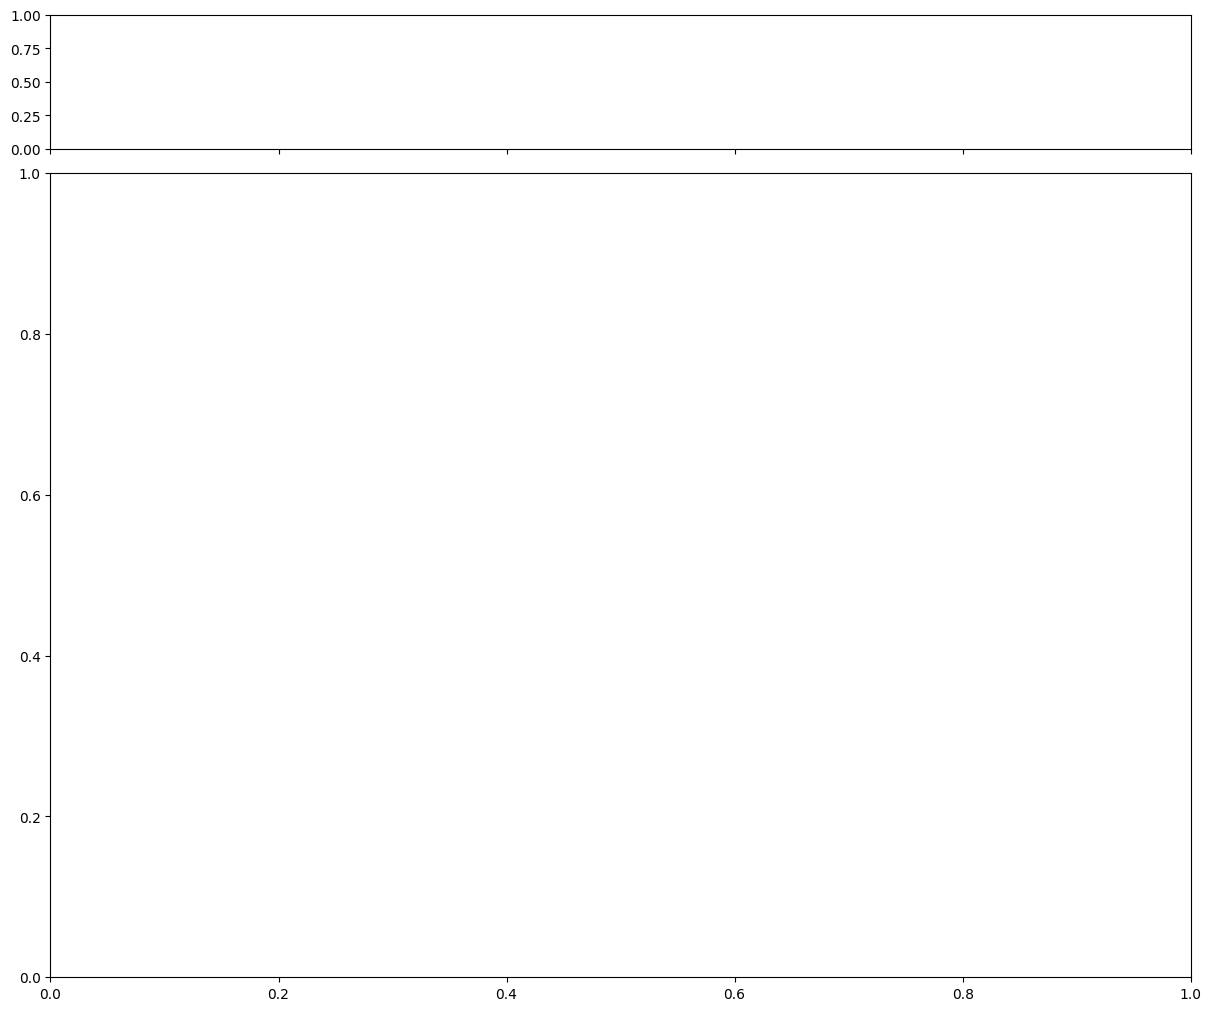

In [5]:
# Display the (currently empty) figure
gv.figure

## Plot alignment data

The `SequenceAlignment` class has two methods for plotting: `draw_pileup` and `draw_alignment`. These methods draw the visualisation on the given track ([Axes](matplotlib.axes.Axes)), and are the main entrance point for further customisation.

In [6]:
# Draw alignment pileup in the first track
painter.draw_pileup(gv.axes[0])

# Draw aligned segments in the second track
painter.draw_alignment(gv.axes[1])

# Adjust start/end coordinates
gv.set_xlim(64040802, 64045633)

(64040802.0, 64045633.0)

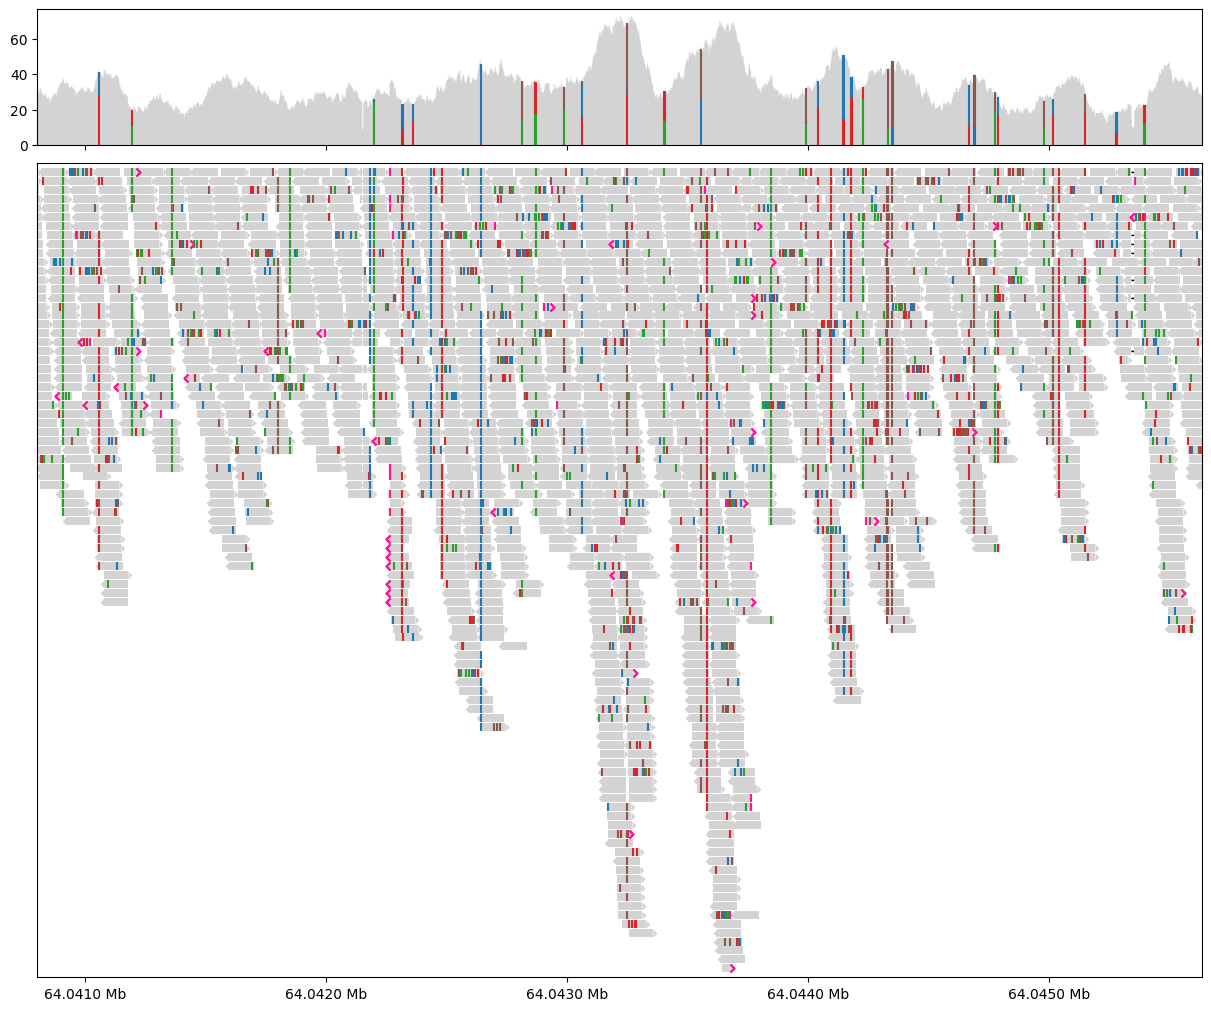

In [7]:
# Display the (now painted) figure
gv.figure

## Save the output figure

The output figure can be saved in various bitmap and vector formats, such as PNG, JPEG, PDF, SVG and EPS. 

In [8]:
# Save the figure as a PNG graphic with resolution 300 dots per inch (DPI)
gv.savefig("SKBR3.png", dpi=300)